In [1]:
from matplotlib import pyplot as plt

import numpy as np

import pandas as pd

import scipy.special
import scipy.stats

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline

In [2]:
np.random.seed(123)

## inspeect data

In [3]:
%%time 

data = pd.read_csv("../../../data/data.csv", parse_dates=["date_time"])

CPU times: user 36 s, sys: 4.07 s, total: 40.1 s
Wall time: 40 s


In [4]:
## data for linear model
#data = all_data[
#    ["date_time", "zone_id", "banner_id", "campaign_clicks", "os_id", "country_id", "impressions", "clicks"]
#]

In [5]:
data.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
0,2021-09-27 00:01:30,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1
1,2021-09-26 22:54:49,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1
2,2021-09-26 23:57:20,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1
3,2021-09-27 00:04:30,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1
4,2021-09-27 00:06:21,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1


In [6]:
data.describe()

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
count,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582140e+07,1.582140e+07,1.582140e+07,1.582147e+07,1.580173e+07,1.580173e+07,1.580173e+07,15821472.0,1.582147e+07
mean,8.152679e+01,3.816483e+02,4.610505e+18,6.238540e-01,1.840605e+00,4.346986e+00,6.571314e+05,1.969248e-01,7.440764e-01,-3.979590e+00,2.605069e+06,1.415899e+00,5.485722e-01,-3.968883e+00,1.0,2.668835e-02
std,1.632448e+02,3.959386e+02,2.663858e+18,9.249152e+00,1.530005e+00,4.317701e+00,2.606008e+06,2.733440e+00,1.670358e+01,1.143982e+00,5.230253e+06,8.689053e+00,1.419136e+01,1.186403e+00,0.0,1.611710e-01
min,0.000000e+00,0.000000e+00,1.116911e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.763740e-02,-8.588970e+00,0.000000e+00,0.000000e+00,-6.983897e-02,-9.562188e+00,1.0,0.000000e+00
25%,1.400000e+01,5.200000e+01,2.297977e+18,0.000000e+00,1.000000e+00,0.000000e+00,7.300000e+01,5.000000e-03,1.643856e-02,-4.515871e+00,9.900000e+01,4.000000e-03,1.615219e-02,-4.529519e+00,1.0,0.000000e+00
50%,1.900000e+01,2.170000e+02,4.614236e+18,0.000000e+00,2.000000e+00,4.000000e+00,3.030000e+02,1.000000e-02,3.539307e-02,-3.921164e+00,4.600000e+02,1.400000e-02,3.556666e-02,-3.928674e+00,1.0,0.000000e+00
75%,6.000000e+01,6.110000e+02,6.914243e+18,0.000000e+00,3.000000e+00,7.000000e+00,7.200000e+02,3.000000e-02,8.022935e-02,-3.421280e+00,1.236000e+03,5.000000e-02,7.546751e-02,-3.390867e+00,1.0,0.000000e+00
max,3.443000e+03,1.632000e+03,9.223371e+18,8.290000e+02,1.000000e+01,1.600000e+01,1.146423e+07,1.000000e+02,6.910888e+02,3.149981e-01,1.462360e+07,1.000000e+02,6.910885e+02,4.756181e-01,1.0,1.000000e+00


In [7]:
data.date_time.min(), data.date_time.max()

(Timestamp('2021-09-01 00:02:49'), Timestamp('2021-10-02 23:59:59'))

## Extract day

In [8]:
data["day"] = (data.date_time - pd.datetime(2021,9,1)).dt.days

/home/ifled/tmpdir/ipykernel_752266/813304573.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data["day"] = (data.date_time - pd.datetime(2021,9,1)).dt.days


In [9]:
data.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks,day
0,2021-09-27 00:01:30,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1,26
1,2021-09-26 22:54:49,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1,25
2,2021-09-26 23:57:20,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1,25
3,2021-09-27 00:04:30,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1,26
4,2021-09-27 00:06:21,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1,26


In [10]:
data.day.min(), data.day.max()

(0, 31)

<AxesSubplot:>

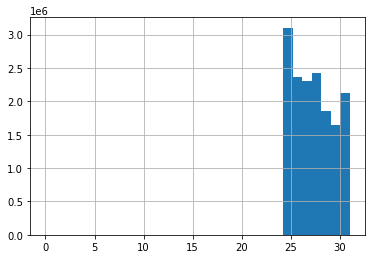

In [11]:
data.day.hist(bins=32)

<AxesSubplot:>

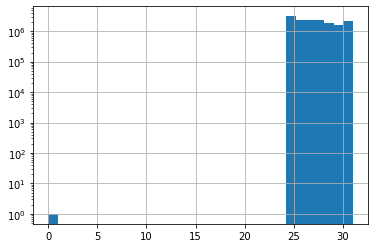

In [12]:
data.day.hist(bins=32, log=True)

In [13]:
data.day.describe()

count    1.582147e+07
mean     2.769505e+01
std      2.039576e+00
min      0.000000e+00
25%      2.600000e+01
50%      2.800000e+01
75%      2.900000e+01
max      3.100000e+01
Name: day, dtype: float64

## There is one outlier:

In [14]:
data[data.day <= 24]

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks,day
1390198,2021-09-01 00:02:49,30,596,5236744527665721365,0,0,7,596,0.05,0.06456,-4.312062,603,0.05,0.05651,-4.370191,1,0,0


## Remove the outlier

In [15]:
data.drop(data[data.day <= 24].index, inplace=True)

In [16]:
data.date_time.min(), data.date_time.max(), data.day.min(), data.day.max()

(Timestamp('2021-09-26 00:00:00'), Timestamp('2021-10-02 23:59:59'), 25, 31)

In [17]:
data.day -= 25

<AxesSubplot:>

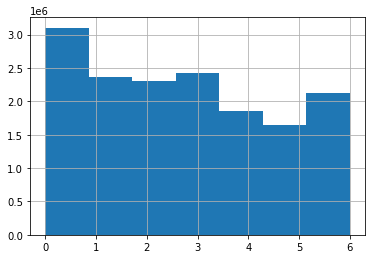

In [18]:
data.day.hist(bins=7)

## Remove rows where banner_id is not equal to banner_id1

In [19]:
data.shape

(15821471, 18)

In [20]:
data = data[data.banner_id == data.banner_id0]

In [21]:
data.shape

(13947159, 18)

## Fix banner_id

Replace banner_ids that aren't appear in the first four days with fixed value

In [22]:
banner_ids = data[data.day <= 3].banner_id.unique()

In [23]:
banner_ids.shape

(1287,)

In [24]:
banner_ids[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11])

In [25]:
known_banner_id = data.banner_id.isin(banner_ids)

In [26]:
known_banner_id.shape

(13947159,)

In [27]:
known_banner_id.sum()

13462822

In [28]:
known_banner_id.mean()

0.9652734295206644

In [29]:
known_banner_id[data.day == 6].mean()

0.891812593292365

In [30]:
known_banner_id[data.day == 5].mean()

0.9061168332478479

In [31]:
data["fixed_banner_id"] = data.banner_id + 1

In [32]:
data.fixed_banner_id.min(), data.fixed_banner_id.max()

(1, 1633)

In [33]:
data.loc[~known_banner_id, "fixed_banner_id"] = 0

In [34]:
data.fixed_banner_id.min(), data.fixed_banner_id.max()

(0, 1633)

In [35]:
known_banner_id1 = data.banner_id1.isin(banner_ids)

In [36]:
known_banner_id1.shape, known_banner_id1.mean(), \
known_banner_id1[data.day == 5].mean(), known_banner_id1[data.day == 6].mean()

((13947159,), 0.7481352295474656, 0.6876228565091423, 0.6685980147702112)

In [37]:
data["fixed_banner_id1"] = data.banner_id1 + 1

In [38]:
data.fixed_banner_id1.min(), data.fixed_banner_id1.max()

(1, 14623603)

In [39]:
data.loc[~known_banner_id1, "fixed_banner_id1"] = 0

In [40]:
data.fixed_banner_id1.min(), data.fixed_banner_id1.max()

(0, 1625)

In [41]:
x, y = pd.factorize(pd.concat([data.fixed_banner_id, data.fixed_banner_id1]))

In [42]:
x.shape, y.shape

((27894318,), (1288,))

In [43]:
z = x.reshape((2, -1)).T

In [44]:
z.shape

(13947159, 2)

In [45]:
data[["banner_id_feat", "banner_id1_feat"]] = z

In [46]:
data[["banner_id_feat", "banner_id1_feat", "banner_id", "banner_id1", "fixed_banner_id", "fixed_banner_id1"]].head(20)

,banner_id_feat,banner_id1_feat,banner_id,banner_id1,fixed_banner_id,fixed_banner_id1
1,0,233,1,269,2,270
2,1,18,2,21,3,22
3,2,88,3,99,4,100
4,3,49,4,11464230,5,0
5,4,31,5,37,6,38
6,5,25,6,29,7,30
7,6,49,7,11464231,8,0
8,7,274,8,243,9,244
9,8,49,9,11464232,10,0
11,9,291,11,314,12,315


In [47]:
data.banner_id_feat.min(), data.banner_id_feat.max()

(0, 1287)

In [48]:
data.banner_id1_feat.min(), data.banner_id1_feat.max()

(0, 1286)

In [49]:
categorical_columns = ["zone_id", "os_id", "country_id"]

In [50]:
for colname in categorical_columns:
    print(colname, data[colname].min(), data[colname].max())
    data[colname] = data[colname].astype(
        pd.api.types.CategoricalDtype(range(data[colname].max() - data[colname].min() + 1))
    )

zone_id 0 3443
os_id 0 10
country_id 0 16


In [51]:
data["banner_id_feat"] = data["banner_id_feat"].astype(
    pd.api.types.CategoricalDtype(range(1288))
)
data["banner_id1_feat"] = data["banner_id1_feat"].astype(
    pd.api.types.CategoricalDtype(range(1288))
)

In [52]:
data.describe(include='all')

/home/ifled/tmpdir/ipykernel_752266/1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,...,rate1,g1,coeff_sum1,impressions,clicks,day,fixed_banner_id,fixed_banner_id1,banner_id_feat,banner_id1_feat
count,13947159,13947159.0,1.394716e+07,1.394716e+07,1.394716e+07,13947159.0,13947159.0,1.394716e+07,1.394716e+07,1.394716e+07,...,1.392748e+07,1.392748e+07,1.392748e+07,13947159.0,1.394716e+07,1.394716e+07,1.394716e+07,1.394716e+07,13947159.0,13947159.0
unique,604704,3302.0,NaN,NaN,NaN,11.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1288.0,1204.0
top,2021-09-26 17:08:47,17.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,49.0
freq,121,1885797.0,NaN,NaN,NaN,4277307.0,4451071.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,484337.0,3512798.0
first,2021-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-10-02 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.042934e+02,4.610500e+18,6.582655e-01,NaN,NaN,4.042934e+02,1.759876e-02,8.242761e-01,...,1.602681e+00,5.769000e-01,-3.926098e+00,1.0,2.642495e-02,2.704638e+00,3.798563e+02,3.402266e+02,NaN,NaN
std,NaN,NaN,4.015323e+02,2.664456e+18,9.836084e+00,NaN,NaN,4.015323e+02,1.916371e-02,1.766021e+01,...,9.238125e+00,1.460710e+01,1.227853e+00,0.0,1.603954e-01,2.038168e+00,3.966996e+02,4.199097e+02,NaN,NaN
min,NaN,NaN,0.000000e+00,1.116911e+12,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,-1.763740e-02,...,0.000000e+00,-6.983897e-02,-8.427827e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,6.700000e+01,2.296001e+18,0.000000e+00,NaN,NaN,6.700000e+01,5.000000e-03,1.788340e-02,...,5.000000e-03,1.625809e-02,-4.507826e+00,1.0,0.000000e+00,1.000000e+00,5.300000e+01,0.000000e+00,NaN,NaN


## train dev test split

In [53]:
train = data[data.day <= 4]
dev = data[data.day == 5]
test = data[data.day == 6]
test_feats = test.drop("clicks", axis='columns')

len(train), len(dev), len(test), len(test_feats)

(10613857, 1442740, 1890562, 1890562)

In [54]:
test_feats.columns

Index(['date_time', 'zone_id', 'banner_id', 'oaid_hash', 'campaign_clicks',
       'os_id', 'country_id', 'banner_id0', 'rate0', 'g0', 'coeff_sum0',
       'banner_id1', 'rate1', 'g1', 'coeff_sum1', 'impressions', 'day',
       'fixed_banner_id', 'fixed_banner_id1', 'banner_id_feat',
       'banner_id1_feat'],
      dtype='object')

## Prepare baseline

In [55]:
train.clicks.mean(), dev.clicks.mean()

(0.022485040075441002, 0.04254543438180129)

## Predict constant learned from train

In [56]:
metrics.log_loss(dev.clicks, [0.022485040075441002] * len(dev))

0.18323001310351755

In [57]:
metrics.log_loss(test.clicks, [0.022485040075441002] * len(test))

0.15945293147295383

## Predict constant learned from dev

In [58]:
metrics.log_loss(dev.clicks, [0.04254543438180129] * len(dev))

0.17595097248598737

In [59]:
metrics.log_loss(test.clicks, [0.04254543438180129] * len(test))

0.15632434782844007

## Apply logistic regression with liblinear optimizer for 'zone_id', 'banner_id', 'os_id', 'country_id'

Will not use model with interactions because it has almost same quality

In [60]:
feature_columns = categorical_columns + ["banner_id_feat"]
feature_columns

['zone_id', 'os_id', 'country_id', 'banner_id_feat']

In [61]:
X_train_cat = train[feature_columns].to_numpy()

In [62]:
ohe = preprocessing.OneHotEncoder(categories=[range(3444), range(11), range(17), range(1288)])

In [63]:
ohe.fit(X_train_cat)

OneHotEncoder(categories=[range(0, 3444), range(0, 11), range(0, 17),
                          range(0, 1288)])

In [64]:
X_train = ohe.transform(X_train_cat)

In [65]:
X_train.shape

(10613857, 4760)

In [66]:
model = linear_model.LogisticRegression(solver='liblinear')

In [67]:
shuffled_train_idxs = list(range(len(train)))
np.random.shuffle(shuffled_train_idxs)

In [68]:
%%time
model.fit(X_train[shuffled_train_idxs[:2000000]], train.clicks.to_numpy()[shuffled_train_idxs[:2000000]])

CPU times: user 1min 13s, sys: 3.47 s, total: 1min 17s
Wall time: 28.9 s


LogisticRegression(solver='liblinear')

In [69]:
X_dev = ohe.transform(dev[feature_columns].to_numpy())

In [70]:
%%time
dev_predict = model.predict_proba(X_dev)

CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 62.7 ms


In [71]:
metrics.log_loss(dev.clicks, dev_predict)

0.15238399769925912

In [72]:
X_test = ohe.transform(test_feats[feature_columns].to_numpy())
test_predict = model.predict_proba(X_test)
metrics.log_loss(test.clicks, test_predict)

0.1364646355605041

## Filter test data

In [73]:
test.shape, test_feats.shape

((1890562, 22), (1890562, 21))

<AxesSubplot:>

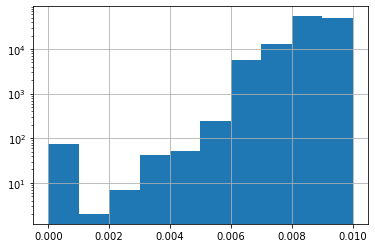

In [74]:
test[test.g0 < 0.01].g0.hist(log=True)

In [75]:
(test.g0 < 0.001).sum()

73

In [76]:
(test.g1 < 0.001).sum()

32418

In [77]:
(test.g1 == 0).sum()

32416

In [78]:
(test.banner_id != test.banner_id0).sum()

0

In [79]:
filtered_test = test[(test.g0 >= 0.001) & (test.g1 >= 0.001)]
banner_0_feats = filtered_test[feature_columns]
banner_1_feats = filtered_test[feature_columns].copy()
banner_1_feats.banner_id_feat = filtered_test.banner_id1_feat

In [80]:
filtered_test.shape, banner_0_feats.shape, banner_1_feats.shape

((1853252, 22), (1853252, 4), (1853252, 4))

In [81]:
filtered_test.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,...,rate1,g1,coeff_sum1,impressions,clicks,day,fixed_banner_id,fixed_banner_id1,banner_id_feat,banner_id1_feat
164,2021-10-02 00:01:07,8,76,8008530729166508034,0,1,3,76,0.008,0.055551,...,0.003,0.030272,-3.390642,1,1,6,0,402,49,355
166,2021-10-02 00:00:56,14,46,6788111278352924668,0,6,0,46,0.004,0.017521,...,5.000,0.085038,-3.329596,1,1,6,47,0,38,49
168,2021-10-02 00:04:05,30,76,4080945494333051894,0,2,3,76,0.008,0.171074,...,0.350,0.079034,-1.907685,1,1,6,0,0,49,49
169,2021-10-02 00:04:12,14,46,5180296235094691109,0,0,0,46,0.004,0.017439,...,0.010,0.017624,-3.889516,1,1,6,47,1,38,254
359,2021-10-02 00:01:09,14,2,4843044827996727497,0,0,0,2,0.014,0.020414,...,0.014,0.068041,-3.088063,1,1,6,3,50,1,41


In [82]:
banner_0_feats.head()

,zone_id,os_id,country_id,banner_id_feat
164,8,1,3,49
166,14,6,0,38
168,30,2,3,49
169,14,0,0,38
359,14,0,0,1


In [83]:
banner_1_feats.head()

,zone_id,os_id,country_id,banner_id_feat
164,8,1,3,355
166,14,6,0,49
168,30,2,3,49
169,14,0,0,254
359,14,0,0,41


## Prepare coeff_sum0_new and coeff_sum_1_new

In [84]:
coeff_sum0_new_proba = model.predict_proba(ohe.transform(banner_0_feats.to_numpy()))
coeff_sum1_new_proba = model.predict_proba(ohe.transform(banner_1_feats.to_numpy()))

In [85]:
coeff_sum0_new_proba[:10, 1]

array([0.04431455, 0.11215698, 0.02721867, 0.06901344, 0.07785941,
       0.00583412, 0.04267378, 0.06901344, 0.06901344, 0.0261955 ])

In [86]:
coeff_sum1_new_proba[:10, 1]

array([0.02612681, 0.11037994, 0.02721867, 0.03209706, 0.07785149,
       0.01009824, 0.0252009 , 0.03209706, 0.06786772, 0.0261955 ])

In [87]:
coeff_sum0_new = scipy.special.logit(coeff_sum0_new_proba[:, 1])
coeff_sum1_new = scipy.special.logit(coeff_sum1_new_proba[:, 1])

In [88]:
coeff_sum0_new[:10]

array([-3.07111586, -2.06889543, -3.57625623, -2.6019436 , -2.47179298,
       -5.13817978, -3.11055948, -2.6019436 , -2.6019436 , -3.61562283])

In [89]:
coeff_sum1_new[:10]

array([-3.61831913, -2.08686603, -3.57625623, -3.40636752, -2.47190322,
       -4.58524504, -3.6553517 , -3.40636752, -2.6199142 , -3.61562283])

## Calc policies

In [90]:
def calc_policy(coeff_sum0, coeff_sum1, g0, g1):
    return scipy.stats.norm.cdf(0, loc=coeff_sum1 - coeff_sum0, scale=(g0**2 + g1**2)**0.5)

In [91]:
p0 = calc_policy(
    filtered_test.coeff_sum0, filtered_test.coeff_sum1,
    filtered_test.g0, filtered_test.g1
)
p0 = pd.DataFrame(p0, index=filtered_test.index, columns=['old p'])

In [92]:
p1 = calc_policy(
    coeff_sum0_new, coeff_sum1_new,
    filtered_test.g0, filtered_test.g1
)
p1 = pd.DataFrame(p1, index=filtered_test.index, columns=['new p'])

### Sanity check

In [93]:
pd.concat(
    [
        pd.DataFrame(
            filtered_test.coeff_sum0 - filtered_test.coeff_sum1,
            index=filtered_test.index,
            columns=['old sum0 - sum1']
        ),
        p0
    ],
    axis=1
)[:10]

,old sum0 - sum1,old p
164,0.463663,1.000000e+00
166,1.952276,1.000000e+00
168,-1.204397,8.233476e-11
169,1.395542,1.000000e+00
359,0.933951,1.000000e+00
361,0.015425,5.187158e-01
362,0.288863,9.716152e-01
363,1.395542,1.000000e+00
364,1.121543,1.000000e+00
365,-1.066456,7.946425e-10


In [94]:
pd.concat(
    [
        pd.DataFrame(coeff_sum0_new - coeff_sum1_new, index=filtered_test.index, columns=['new sum0 - sum1']),
        p1
    ],
    axis=1
)[:10]

,new sum0 - sum1,new p
164,0.547203,1.000000
166,0.017971,0.581986
168,0.000000,0.500000
169,0.804424,1.000000
359,0.000110,0.500619
361,-0.552935,0.046251
362,0.544792,0.999837
363,0.804424,1.000000
364,0.017971,0.589678
365,0.000000,0.500000


## Calculate clipped ips

In [95]:
p0.min()

old p    0.0
dtype: float64

In [96]:
(p0 <= 0).sum()

old p    142504
dtype: int64

In [97]:
(p0 <= 0).sum()

old p    142504
dtype: int64

(array([266904.,  37176.,  48429.,  70327., 225036., 267145.,  92711.,
         79225.,  80699., 543096.]),
 array([5.90322107e-311, 1.00000000e-001, 2.00000000e-001, 3.00000000e-001,
        4.00000000e-001, 5.00000000e-001, 6.00000000e-001, 7.00000000e-001,
        8.00000000e-001, 9.00000000e-001, 1.00000000e+000]),
 <BarContainer object of 10 artists>)

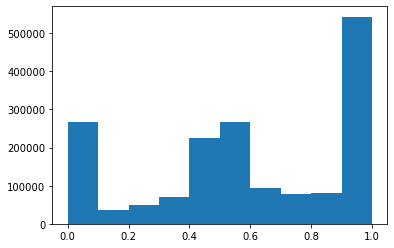

In [98]:
plt.hist(p0[p0 > 0])

(array([226633.,   6936.,   5467.,   4687.,   4262.,   4231.,   3720.,
          3709.,   3606.,   3653.]),
 array([5.90322107e-311, 9.99994471e-003, 1.99998894e-002, 2.99998341e-002,
        3.99997788e-002, 4.99997235e-002, 5.99996683e-002, 6.99996130e-002,
        7.99995577e-002, 8.99995024e-002, 9.99994471e-002]),
 <BarContainer object of 10 artists>)

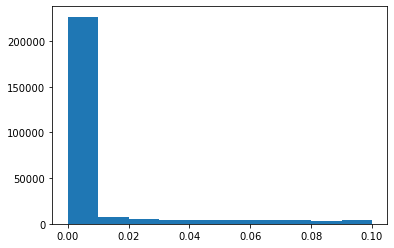

In [99]:
plt.hist(p0[(0.1 > p0) & (p0 > 0)])

(array([  6937.,   7130.,   7448.,   6946.,   8299.,  10608.,  12594.,
         16023.,  35351., 155568.]),
 array([-714.32846578, -643.12587826, -571.92329074, -500.72070323,
        -429.51811571, -358.3155282 , -287.11294068, -215.91035317,
        -144.70776565,  -73.50517814,   -2.30259062]),
 <BarContainer object of 10 artists>)

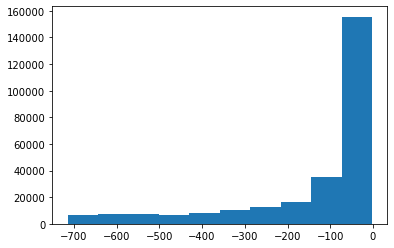

In [100]:
plt.hist(np.log(p0[(0.1 > p0) & (p0 > 0)]))

In [101]:
lmbd = 10

In [102]:
%%time

good_indices = p0["old p"] > 0

cips_terms = filtered_test[good_indices].clicks * np.minimum(p1[good_indices]["new p"] / p0[good_indices]["old p"], lmbd)

CPU times: user 204 ms, sys: 68 ms, total: 272 ms
Wall time: 245 ms


In [103]:
cips_terms.head()

164     1.000000
166     0.581986
168    10.000000
169     1.000000
359     0.500619
dtype: float64

In [104]:
pd.concat([
        pd.DataFrame(cips_terms, index=filtered_test[good_indices].index),
        p0[good_indices],
        p1[good_indices],
        filtered_test[good_indices].clicks,
    ],
    axis=1
).set_axis(['cips', 'p0', 'p1', 'clicks'], axis=1)[:10]

,cips,p0,p1,clicks
164,1.000000,1.000000e+00,1.000000,1
166,0.581986,1.000000e+00,0.581986,1
168,10.000000,8.233476e-11,0.500000,1
169,1.000000,1.000000e+00,1.000000,1
359,0.500619,1.000000e+00,0.500619,1
361,0.089164,5.187158e-01,0.046251,1
362,1.029046,9.716152e-01,0.999837,1
363,1.000000,1.000000e+00,1.000000,1
364,0.589678,1.000000e+00,0.589678,1
365,10.000000,7.946425e-10,0.500000,1


In [105]:
pd.concat([
        pd.DataFrame(cips_terms, index=filtered_test[good_indices].index),
        p0[good_indices],
        p1[good_indices],
        filtered_test[good_indices].clicks,
    ],
    axis=1
).set_axis(['cips', 'p0', 'p1', 'clicks'], axis=1)[90:100]

,cips,p0,p1,clicks
1000,0.967257,9.999213e-01,0.967181,1
1002,0.000838,6.260620e-02,0.000052,1
1003,0.995603,1.000000e+00,0.995603,1
1004,0.939311,8.864047e-01,0.832610,1
1005,0.773321,1.000000e+00,0.773321,1
1023,1.771829,5.001344e-01,0.886153,1
1024,1.000000,1.000000e+00,1.000000,1
1026,0.774576,1.000000e+00,0.774576,1
1027,10.000000,4.122504e-08,0.000046,1
1028,1.231934,8.117263e-01,0.999993,1


In [106]:
pd.concat([
        pd.DataFrame(cips_terms, index=filtered_test[good_indices].index),
        p0[good_indices],
        p1[good_indices],
        filtered_test[good_indices].clicks,
    ],
    axis=1
).set_axis(['cips', 'p0', 'p1', 'clicks'], axis=1)[1000000:1000010]

,cips,p0,p1,clicks
9182140,0.0,6.993238e-01,5.000000e-01,0
9182154,0.0,9.688807e-01,1.000000e+00,0
9182157,0.0,4.572967e-01,1.000000e+00,0
9182160,0.0,1.000000e+00,1.608526e-15,0
9182162,0.0,2.809104e-03,7.213109e-01,0
9182179,0.0,1.909707e-17,2.086228e-03,0
9182198,0.0,4.061156e-01,9.999094e-01,0
9182199,0.0,5.929534e-01,2.793164e-01,0
9182204,0.0,8.875620e-01,1.000000e+00,0
9182261,0.0,1.575496e-01,5.128322e-03,0


## CIPS value

In [107]:
cips_terms.mean()

0.06093327402062962

In [108]:
filtered_test[good_indices].clicks.mean()

0.038002674853339004

## Tune regularization coefficient using CIPS value

In [109]:
def calc_cips(model, ):
    coeff_sum0_new_proba = model.predict_proba(ohe.transform(banner_0_feats.to_numpy()))
    coeff_sum1_new_proba = model.predict_proba(ohe.transform(banner_1_feats.to_numpy()))
    
    coeff_sum0_new = scipy.special.logit(coeff_sum0_new_proba[:, 1])
    coeff_sum1_new = scipy.special.logit(coeff_sum1_new_proba[:, 1])
    
    p0 = calc_policy(
        filtered_test.coeff_sum0, filtered_test.coeff_sum1,
        filtered_test.g0, filtered_test.g1
    )
    p0 = pd.DataFrame(p0, index=filtered_test.index, columns=['old p'])
    
    p1 = calc_policy(
        coeff_sum0_new, coeff_sum1_new,
        filtered_test.g0, filtered_test.g1
    )
    p1 = pd.DataFrame(p1, index=filtered_test.index, columns=['new p'])
    
    good_indices = p0["old p"] > 0
    cips_terms = filtered_test[good_indices].clicks * np.minimum(p1[good_indices]["new p"] / p0[good_indices]["old p"], lmbd)
    
    assert cips_terms.isna().sum() == 0
    
    return cips_terms.mean()

In [110]:
calc_cips(model)

0.06093327402062962

In [116]:
coefs = np.logspace(-2, 2, num=21)
coefs

array([1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
       6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
       3.98107171e-01, 6.30957344e-01, 1.00000000e+00, 1.58489319e+00,
       2.51188643e+00, 3.98107171e+00, 6.30957344e+00, 1.00000000e+01,
       1.58489319e+01, 2.51188643e+01, 3.98107171e+01, 6.30957344e+01,
       1.00000000e+02])

In [117]:
%%time

all_metrics = []
for C in coefs:
    for penalty in ['l2']:
        current_model = linear_model.LogisticRegression(penalty=penalty, solver='liblinear', C=C)
        
        current_model.fit(X_train[shuffled_train_idxs[:2000000]], train.clicks.to_numpy()[shuffled_train_idxs[:2000000]])

        X_dev = ohe.transform(dev[feature_columns].to_numpy())
        dev_predict = current_model.predict_proba(X_dev)
        dev_log_loss = metrics.log_loss(dev.clicks, dev_predict)
        
        X_test = ohe.transform(test_feats[feature_columns].to_numpy())
        test_predict = current_model.predict_proba(X_test)
        test_log_loss = metrics.log_loss(test.clicks, test_predict)
        
        cips = calc_cips(current_model)
        
        all_metrics.append((C, penalty, dev_log_loss, test_log_loss, cips))
        print(f"C={C}, penalty={penalty} done")

C=0.01, penalty=l2 done
C=0.015848931924611134, penalty=l2 done
C=0.025118864315095794, penalty=l2 done
C=0.039810717055349734, penalty=l2 done
C=0.06309573444801933, penalty=l2 done
C=0.1, penalty=l2 done
C=0.15848931924611143, penalty=l2 done
C=0.25118864315095807, penalty=l2 done
C=0.3981071705534973, penalty=l2 done
C=0.6309573444801934, penalty=l2 done
C=1.0, penalty=l2 done
C=1.584893192461114, penalty=l2 done
C=2.5118864315095824, penalty=l2 done
C=3.981071705534973, penalty=l2 done
C=6.309573444801936, penalty=l2 done
C=10.0, penalty=l2 done
C=15.848931924611142, penalty=l2 done
C=25.11886431509582, penalty=l2 done
C=39.810717055349734, penalty=l2 done
C=63.095734448019364, penalty=l2 done
C=100.0, penalty=l2 done
CPU times: user 38min 54s, sys: 1min 55s, total: 40min 49s
Wall time: 15min 53s


In [123]:
table = pd.DataFrame(all_metrics, columns=['C', 'penalty', 'dev log_loss', 'test log_loss', 'cips'])
table

,C,penalty,dev log_loss,test log_loss,cips
0,0.010000,l2,0.155511,0.138326,0.062454
1,0.015849,l2,0.154568,0.137644,0.062382
2,0.025119,l2,0.153827,0.137136,0.061886
3,0.039811,l2,0.153286,0.136788,0.061834
4,0.063096,l2,0.152909,0.136572,0.062029
5,0.100000,l2,0.152661,0.136452,0.061977
6,0.158489,l2,0.152504,0.136396,0.061851
7,0.251189,l2,0.152417,0.136382,0.061642
8,0.398107,l2,0.152377,0.136395,0.061447
9,0.630957,l2,0.152370,0.136424,0.061197


In [124]:
table.iloc[table['dev log_loss'].argmin()]

C                0.630957
penalty                l2
dev log_loss      0.15237
test log_loss    0.136424
cips             0.061197
Name: 9, dtype: object

In [125]:
table.iloc[table['test log_loss'].argmin()]

C                0.251189
penalty                l2
dev log_loss     0.152417
test log_loss    0.136382
cips             0.061642
Name: 7, dtype: object

In [127]:
table.iloc[table['cips'].argmax()]

C                    0.01
penalty                l2
dev log_loss     0.155511
test log_loss    0.138326
cips             0.062454
Name: 0, dtype: object

## So given test cips the best C is 0.01

Note:
- it is more correct to use cips on devset to choose C instead of test cips
- probably decreasing C will increase test cips
- C does not affect log loss and cips too much
- train with l1 penalty was too slow so I use l2 only